In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

# k-means

In [2]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

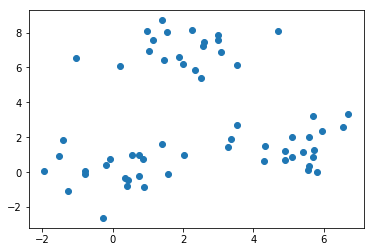

In [3]:
plt.scatter(points[:,0],points[:,1])
plt.show()

In [4]:
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=3,n_jobs=5)
model.fit(points)
labels = model.predict(points)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


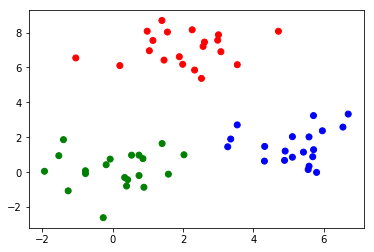

In [5]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[np.array(labels)])
plt.show()

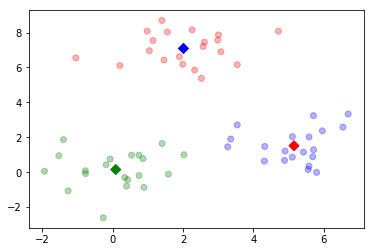

In [6]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[np.array(labels)],alpha=0.3)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=["blue","green","red"],s=50)
plt.show()

In [7]:
model = KMeans(n_clusters=3,verbose=1)
model.fit(points)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 125.355066988
start iteration
done sorting
end inner loop
Iteration 1, inertia 125.355066988
center shift 0.000000e+00 within tolerance 7.721251e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 125.355066988
start iteration
done sorting
end inner loop
Iteration 1, inertia 125.355066988
center shift 0.000000e+00 within tolerance 7.721251e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 125.355066988
start iteration
done sorting
end inner loop
Iteration 1, inertia 125.355066988
center shift 0.000000e+00 within tolerance 7.721251e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 125.355066988
start iteration
done sorting
end inner loop
Iteration 1, inertia 125.355066988
center shift 0.000000e+00 within tolerance 7.721251e-04
Initialization complete
start iteration
done sor

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

# Zadanie
Ćwiczenie: wygenerować poniższe dane i dopasować model z trzema klastrami.

In [8]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,20),np.array([[4,0],[0,4]]),30)],axis=0)

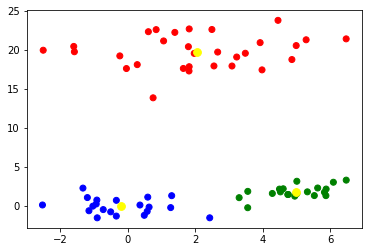

In [9]:
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)

plt.scatter(points[:,0],points[:,1],c=np.array(["red","blue","green"])[labels])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=60,c="yellow")
plt.show()

# Transformacje danych - dane, które podajemy algorytmomwi mają ogromne znaczenie!

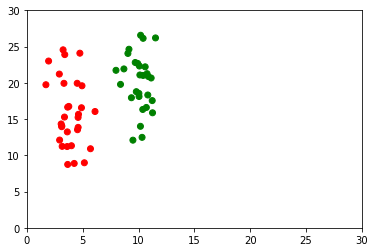

In [18]:
rnd.seed(1)
n = 30
points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),
                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)
labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [19]:
model = KMeans(n_clusters=2)
model.fit(points)
labels = model.predict(points)
print(labels)

[0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]


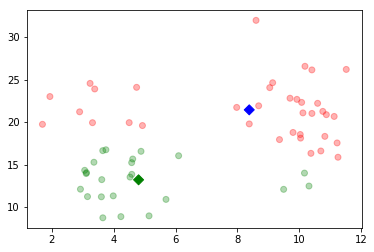

In [20]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[np.array(labels)],alpha=0.3)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=["blue","green","red"],s=50)
plt.show()

Widzimy, że pogrupowało się po y...
Gdy różnica na osi y jest znacząco większa niż rożnica na osi x (y >>x)- patrząc na odegłość euklidesową w takiej sytuacji zachodzi:
$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} \approx \sqrt{(y_1-y_2)^2})$
Czyli grupowanie opiera się na zmiennej (zmiennych) dominującej

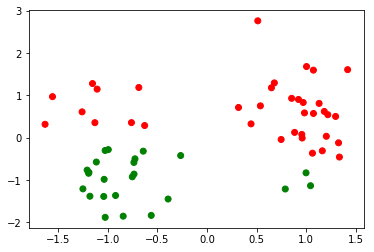

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
points = scaler.fit_transform(points) #SREDNIA 0 I SD 1

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])

plt.show()

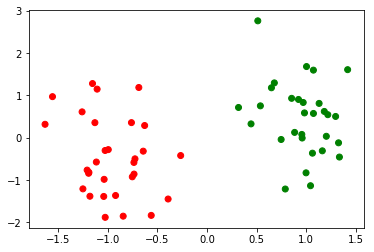

In [22]:
model = KMeans(n_clusters=2)
groups = model.fit_predict(points) # pierwszy raz się pojawia FIT_PREDICT - ZWRÓCIĆ UWAGĘ

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[groups])

plt.show()

# Tworzenie pipeline'a (tego na zajęciach już nie poruszaliśmy):

In [24]:
from sklearn.pipeline import make_pipeline

sc = StandardScaler()
km = KMeans(2)
scaled_kmeans = make_pipeline(sc,km)
labels = scaled_kmeans.fit_predict(points)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


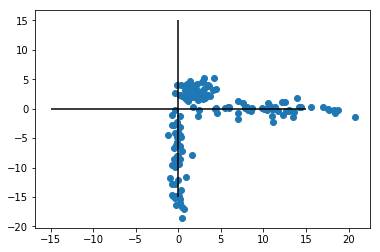

In [26]:
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.show()

# Zadanie: 
Dopasować model i zwizualizować.

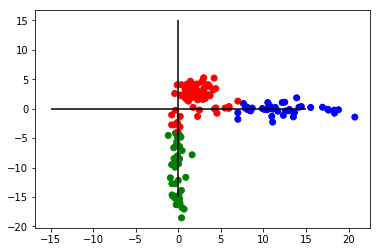

In [31]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(points)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[groups])
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)

plt.show()

Scale input vectors individually to unit norm (vector length).

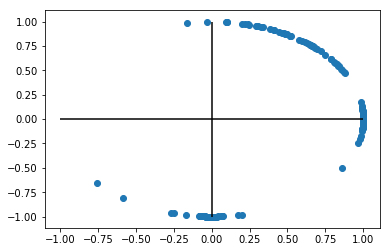

In [33]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
points2 = normalizer.fit_transform(points)


plt.scatter(points2[:,0],points2[:,1])
plt.hlines(0,-1,1)
plt.vlines(0,-1,1)
plt.show()

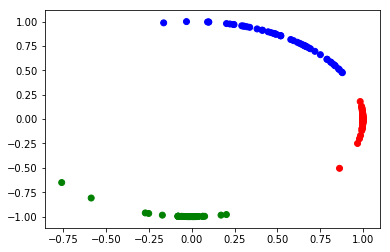

In [37]:
model = KMeans(n_clusters=3)
groups = model.fit_predict(points2)

plt.scatter(points2[:,0],points2[:,1],c = np.array(["red","green","blue"])[groups])
#plt.hlines(0,-15,15)
#plt.vlines(0,-15,15)
plt.show()

In [84]:
data =pd.read_csv("F:\\SZKOLENIE\\data_analysis\\AD01\\fish.csv", sep=";",decimal=",")
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1


In [44]:
data.describe()
# """BE CLOSE TO YOUR DATA""" -> mamy rybę z zerową wagą

,Weight,Length1,Length2,Length3,Height,Width,Species
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,398.695570,26.226582,28.393038,31.188608,28.256329,14.119620,4.518987
std,359.086204,10.024844,10.746572,11.637010,8.296377,2.281229,2.385523
min,0.000000,7.500000,8.400000,8.800000,14.500000,8.700000,1.000000
25%,120.000000,19.025000,21.000000,23.125000,24.225000,13.400000,2.250000
50%,272.500000,25.100000,27.150000,29.350000,27.000000,14.600000,5.000000
75%,650.000000,32.700000,35.750000,39.675000,37.700000,15.300000,7.000000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,20.900000,7.000000


## Mamy zadane grupy - species - będziemy ich używać do oceny grupowania

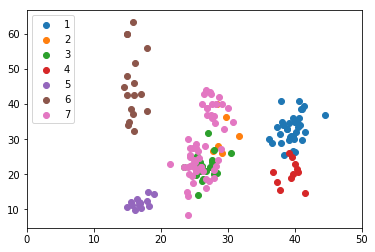

In [45]:
for i in data.Species.unique():
    plt.scatter(data.loc[data.Species==i,"Height"],data.loc[data.Species==i,"Length2"],label=i)
plt.xlim(0,50)
plt.legend()
plt.show()

# Usuwamy rybki z zerową wagą

In [48]:
data = data[data.Weight>0]

In [49]:
model = KMeans(n_clusters=7).fit(data.drop('Species',axis=1))
pd.crosstab(data.Species,model.predict(data.drop('Species',axis=1)))

col_0,0,1,2,3,4,5,6
Species,,,,,,,
1,10,0,0,13,6,0,5
2,1,0,0,1,1,0,3
3,0,12,0,0,0,4,3
4,0,6,0,0,0,3,2
5,0,0,0,0,0,14,0
6,1,1,3,6,2,0,4
7,9,20,0,2,8,9,8


# Miara V-score
Miara V-score mierzy w pewien sposób jak klastry rozkładają się względem zadanych etykiet.

https://clusteval.sdu.dk/1/clustering_quality_measures/15

In [51]:
from sklearn.metrics.cluster import v_measure_score

v_measure_score(data.Species,model.predict(data.drop('Species',axis=1)))

0.31023773843098096

# Zadanie 
Proszę przekształcić dane, żeby model był w miarę dobry

In [52]:
species = data.Species
data = data.drop('Species',axis=1)

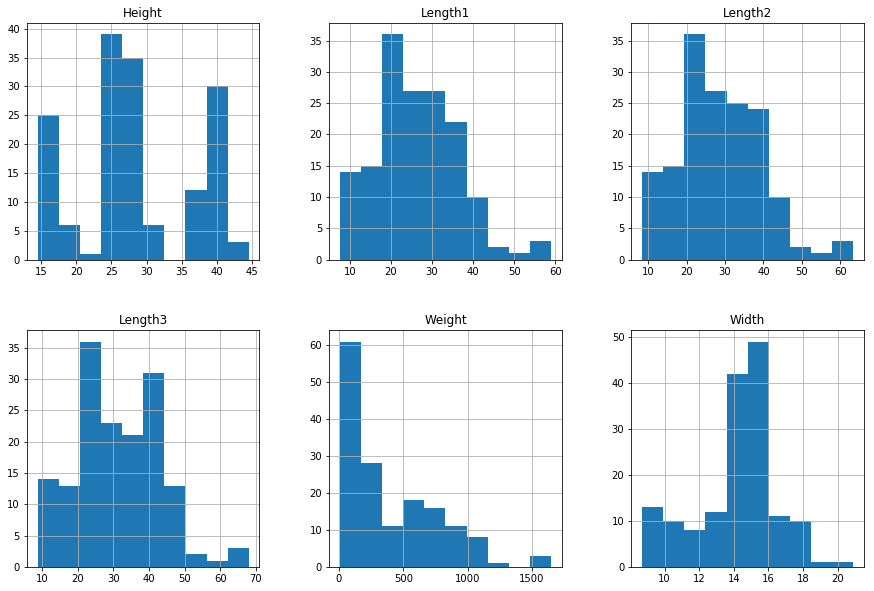

In [53]:
plt.figure()
data.hist(figsize=(15,10),xlabelsize=10,layout=(2,3))
plt.show()

In [54]:
scaler = StandardScaler()

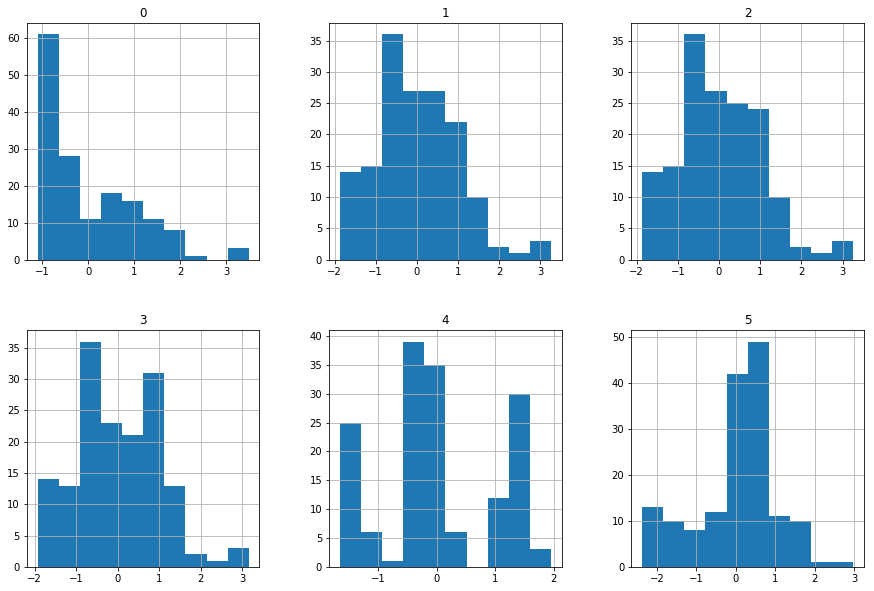

In [55]:
data2 = pd.DataFrame(scaler.fit_transform(data))
data2.describe()

plt.figure()
data2.hist(figsize=(15,10),xlabelsize=10,layout=(2,3))
plt.show()

In [56]:
kmeans = KMeans(n_clusters=7)
pipeline = make_pipeline(scaler,kmeans)
groups = pipeline.fit_predict(data)
pd.crosstab(species,groups)
v_measure_score(species,groups)

0.7687946285765842

# Wyznaczanie liczby klastrów
Dokładna ocena wyniku grupowania jest bardzo trudna i praktycznie niemożliwa. Na szczęście w praktyce bardzo dokładna ocena z reguły nie jest potrzebna (w myśl zasady good enough). Uwaga: klastrowanie nigdy nie będzie idealne!

I krok.

- Uwzględnienie wiedzy apriori (wiedzy dziedzinowej, wiedzy eksperciej).
intuicja, doświadczenie, "wiedza ekspercka" (np. grupujemy tematycznie książki, które mamy w ofercie: czy 2 klasstry mają sens? czy 10000 klastór ma sens?)
- założenia biznesowe (jeżeli grupujemy klientów celem dopasowania odpowiedniej oferty, to grup będzie tyle ile róznych ofert jesteśmy w stanie zaproponować; zależność dwukierunkowa - realia mogą narzucać liczbę grup, lub model może sugerować liczbę ofert)
- Z reguły będziemy w stanie określić przedział dla sensownych wartości

II krok.
Ocena na oko

- ocena nie jest dokładna, ale bardzo wartościowa
- trzeba uważać, bo dużej próbki nie będziemy oceniać i nasza ocena jest obarczona BARDZO DUŻĄ niepewnością (statystyka!)
- trochę przewrotnie często jest to często najlepsza i wystarczająca metoda oceny

III krok.

- Obliczanie miar jakości podziału 
-- obliczanie numerycznych mierników jakości grupowania.
Ciężko dobrać miarę, trudno zinterpretować, wcale nie musi się pokrywać z optymalnym rozwiązaniem z perspektywy problemu biznesowego...

IV krok.

- Ocena na podstawie jakości całego procesu, w którego to grupowanie jest elementem czasochłonna i często trudna do zrealizowania z powodu realiów. Ale tak naprawdę najlepsza...

In [57]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))

In [58]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                    rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

# Zadanie 
Zobrazować środki klastrow w zależności od liczby klastrów. Następnie zrobić wykres inercji od liczby klastrów

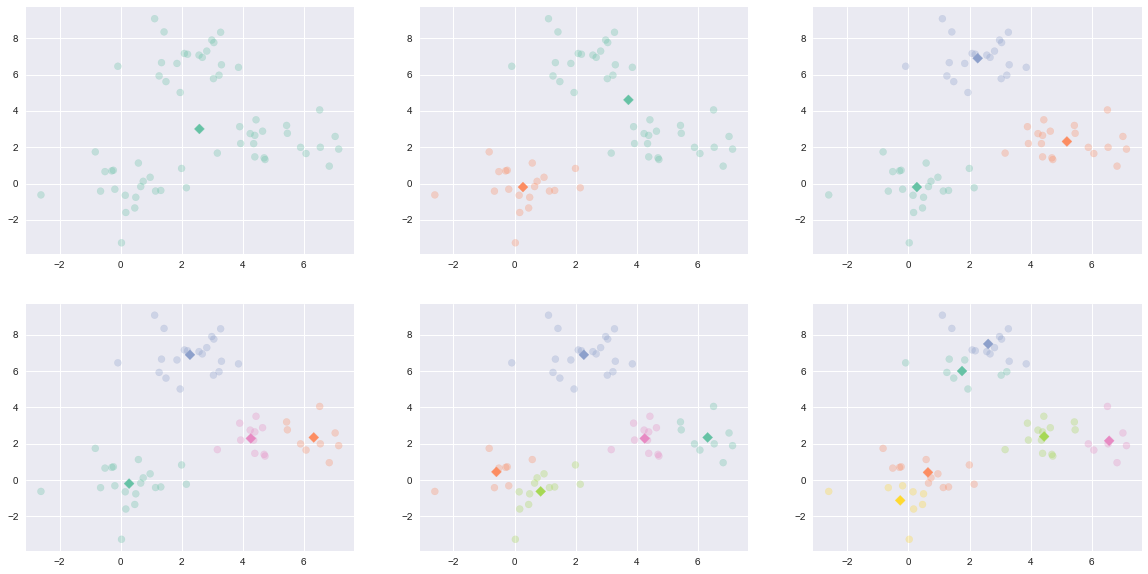

In [59]:
ks = range(1, 7)
inertias = []

plt.figure(figsize=(20,10))

for k in ks:
    
    model = KMeans(n_clusters=k)

    model.fit(points)
    labels = model.labels_
    
    inertias.append(model.inertia_)
    
    plt.subplot(2,3,k)
    plt.scatter(points[:,0],points[:,1],c=colors[labels],alpha=0.3)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=colors,s=50)

plt.show()

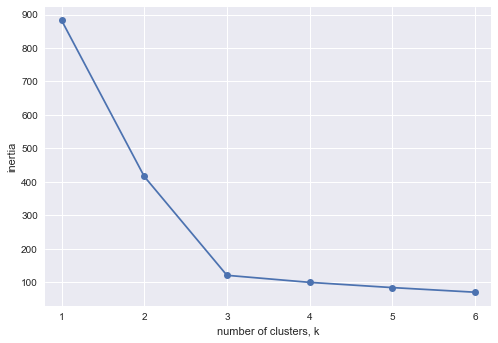

In [60]:
# Plot ks vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

# Jak wybrać optymalne K? - Reguła łokcia



## Miara silhouette_score

Najpierw objaśnienie graficzne na tablicy, potem wzór, potem rysunki

https://en.wikipedia.org/wiki/Silhouette_(clustering)

Wielkość dla jednego punktu:

$s(i) = \frac{b(i)  - a(i)}{max\{a(i),b(i)\}}$

$a(i)$ - średnia odległość punktów od punku i w danym klastrze

$b(i)$ - średnia odległość punktów z najbliższego klastra od punku i

Wartości z [-1,1]. Im większa wartość tym lepiej.

Ocena ostateczna: średnia globalna z s(i) wszystkich punktów.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [61]:
from sklearn.metrics import silhouette_score


In [63]:
ks = range(2, 7)
silhouette = []

for k in ks:  
    model = KMeans(n_clusters=k)
    model.fit(points)
    silhouette.append(silhouette_score(points,model.predict(points)))

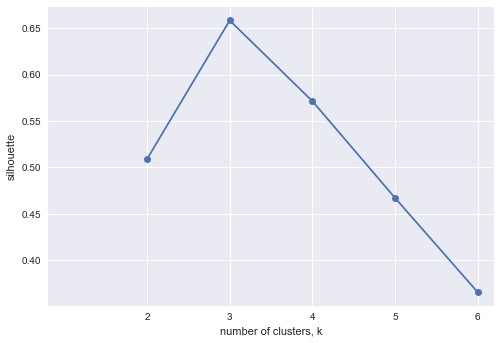

In [65]:
# Plot ks vs silhouette
plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

# Zadanie  
Spróbować wyznaczyć liczbę klastrów dla poniższych danych

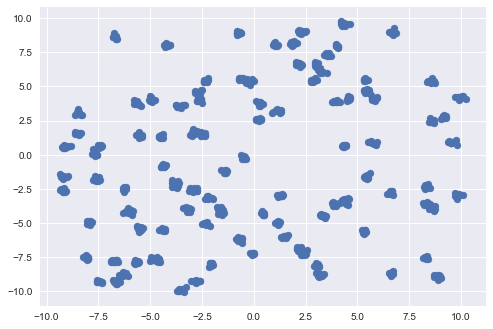

In [68]:
from sklearn.datasets import make_blobs

points, l = make_blobs(1000,centers=100,cluster_std=0.1)
plt.scatter(points[:,0],points[:,1])
plt.show()

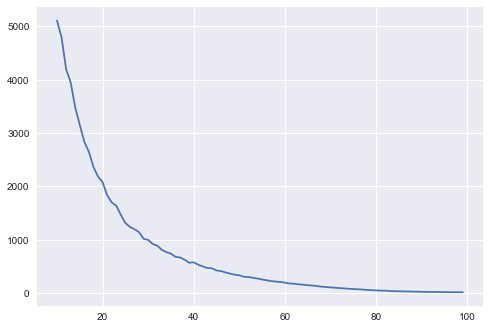

In [70]:
inertia = []
for i in range(10,100):
    km = KMeans(i)
    inertia.append(km.fit(points).inertia_)
    
plt.plot(range(10,100),inertia)
plt.show()

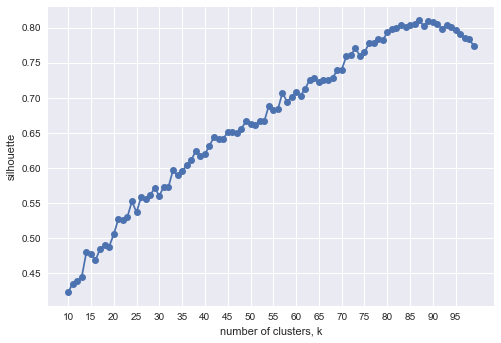

In [71]:
ks = range(10, 100)
silhouette = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points)
    silhouette.append(silhouette_score(points,model.predict(points)))
# Plot ks vs silhouette
plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(ks[::5])

plt.show()

# Zadanie
Wyznaczyć liczbę klastrów na danych fish.

In [85]:
data =pd.read_csv("F:\\SZKOLENIE\\data_analysis\\AD01\\fish.csv", sep=";",decimal=",")
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1


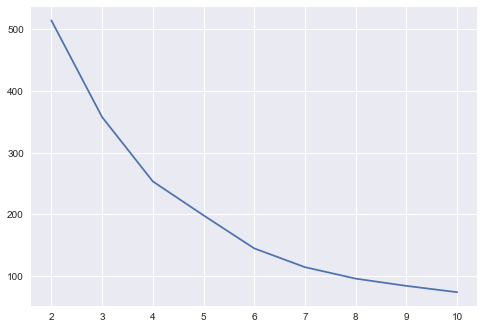

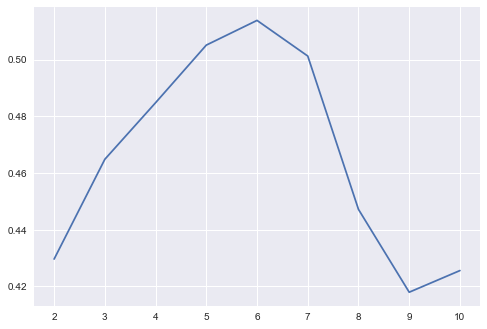

In [74]:
#data = data[data.Weight>0]
data.iloc[:,0:-1] = StandardScaler().fit_transform(data.iloc[:,0:-1])
inertia = []
sil = []

for k in range(2,11):
    km = KMeans(k)
    m = km.fit(data.iloc[:,0:-1])
    inertia.append(m.inertia_)
    sil.append(silhouette_score(data.iloc[:,0:-1],m.predict(data.iloc[:,0:-1])))

plt.plot(range(2,11),inertia)
plt.show()
plt.plot(range(2,11),sil)
plt.show()

# Zadanie
Proszę porównać sytuację, gdy wyrzucamy lub nie rybę z zerową wagą.

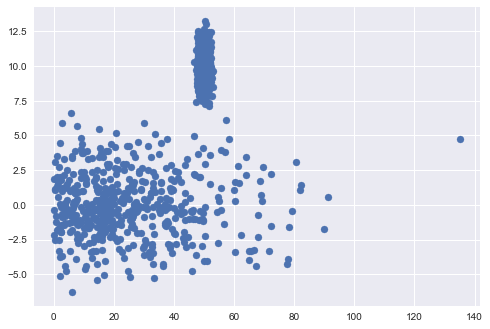

In [75]:
x1 = rnd.multivariate_normal((0,0),[[1000,0],[0,5]],1000)
x1 = x1[x1[:,0]>0,:]

x2 = rnd.multivariate_normal((50,10),[[1,0],[0,1]],1000)

x = np.vstack([x1,x2])

plt.scatter(x[:,0],x[:,1])
plt.show()

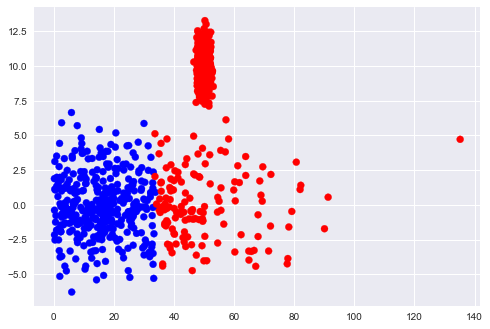

In [76]:
kmeans = KMeans(2)
kmeans.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=np.array(["red","blue"])[kmeans.labels_])
plt.show()

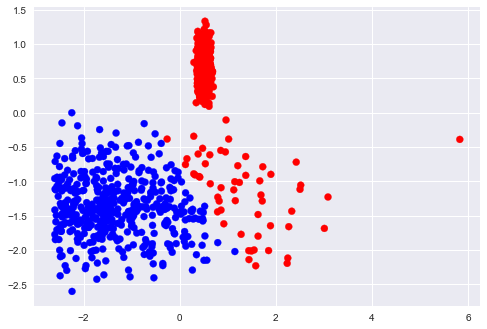

In [77]:
sc = StandardScaler()
x2 = sc.fit_transform(x)

l = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue"])[l])
plt.show()

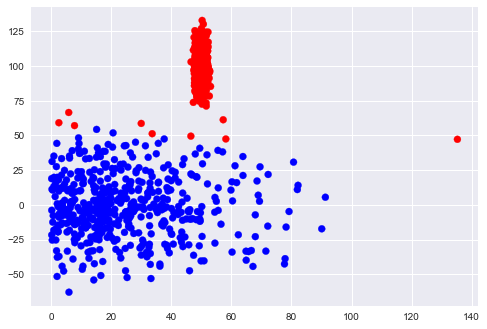

In [78]:
x2 = x.copy()
x2[:,1] = 10*x2[:,1]
l = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue"])[l])
plt.show()

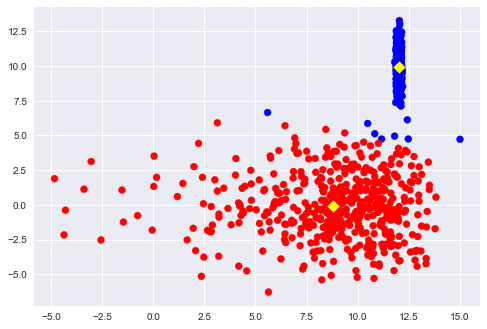

In [79]:
x2 = x.copy()
x2[:,0] = 3*np.log(1.1*x2[:,0])
l = kmeans.fit_predict(x2)
centers = kmeans.fit(x2).cluster_centers_
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue"])[l])
plt.scatter(centers[:,0],centers[:,1],marker="D",c="yellow",s=70)
plt.show()

# Zadanie 

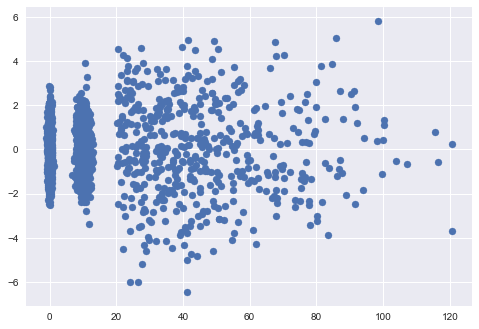

In [81]:
x1 = rnd.multivariate_normal((20,0),[[1000,0],[0,5]],1000)
x1 = x1[x1[:,0]>20,:]


x2 = rnd.multivariate_normal((0,0),[[0.1,0],[0,1]],1000)

x3 = rnd.multivariate_normal((10,0),[[1,0],[0,1]],1000)

x = np.vstack([x1,x2,x3])
plt.scatter(x[:,0],x[:,1])
plt.show()

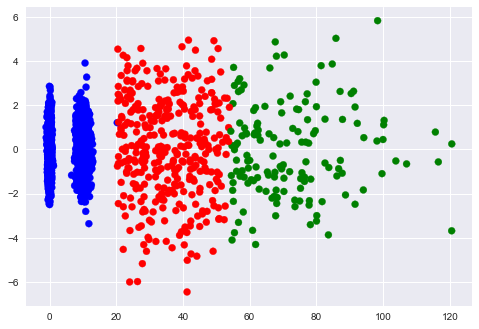

In [82]:
kmeans = KMeans(3)
kmeans.fit_predict(x)

plt.scatter(x[:,0],x[:,1],c=np.array(["red","blue","green"])[kmeans.labels_])
plt.show()

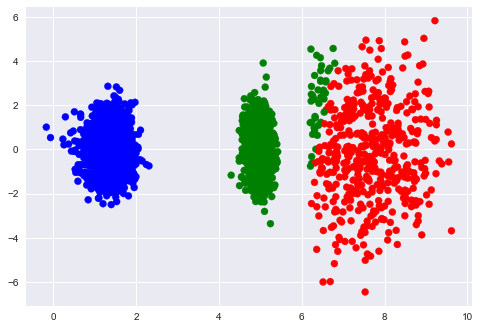

In [83]:
x2 = x.copy()
x2[:,0] = 2*np.log(2+x2[:,0])

l = kmeans.fit_predict(x2)
plt.scatter(x2[:,0],x2[:,1],c=np.array(["red","blue","green"])[l])
plt.show()

# Clustering: K-Means In-Depth

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [87]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

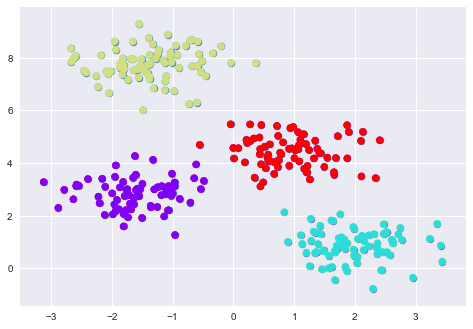

In [89]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');
plt.show()

In [90]:
from sklearn.datasets import load_digits
digits = load_digits()

In [91]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

# Środki 

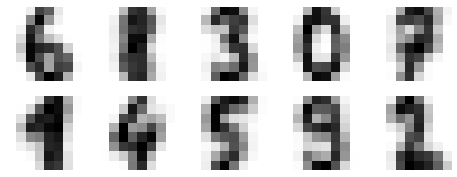

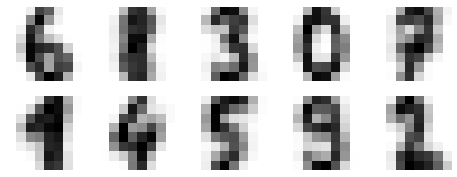

In [93]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()    

The cluster labels are permuted; let's fix this:

In [94]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

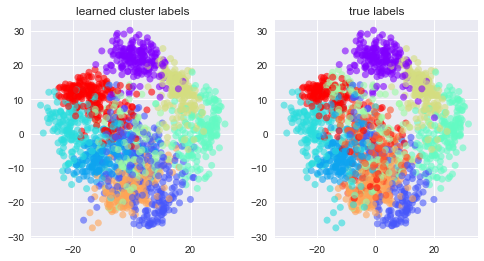

In [97]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');
plt.show()

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79187534780189206

80% – not bad! Let's check-out the confusion matrix for this:

[[176   0   0   0   2   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  10 148  13   0   0   0   3   0   2]
 [  0   7   1 157   0   2   0   6   0  10]
 [  0   5   0   0 166   0   0  10   0   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   4   0   0   0   5   0 170   0   0]
 [  0 105   3   2   0   7   2   3   0  52]
 [  0  20   0   6   0   7   0   8   0 139]]


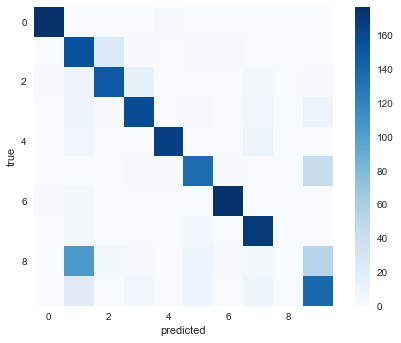

In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');
plt.show()

# Example: KMeans for Color Compression

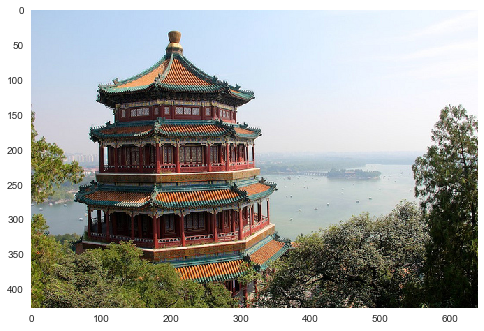

In [104]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);
plt.show()

In [105]:
china.shape

(427, 640, 3)

In [106]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


In [ ]:

# reduce the size of the image for speed
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))
p    